# Anti-money laundering and fraud investigations can be effective methods of spotting illegal trafficking. The link to the data is below. This is simulation data created by someone else. This is my fist time analysing financial data and learning about money laundering and fraud so I do not have any specific objective for this analysis but as I learn I'll continue with more projects related to anti-money laundering.

In [1]:
#https://www.kaggle.com/maryam1212/money-laundering-data?select=MLtag.csv

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
plt.style.use('ggplot')
df = pd.read_csv('ML.csv')
df2 = pd.read_csv('MLtag.csv')

C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
aml = df.join(df2, how='inner')   

## Cleaning type of crime variable

In [4]:
aml['typeofcrime'].value_counts()

type3      539
type1      448
type2      433
type2-1     32
type2-2     32
Name: typeofcrime, dtype: int64

In [5]:
aml['crime_int'] = aml['typeofcrime'].str[4]

In [6]:
#Crime type 2-1 and 2-2 were automatically added to crime type 2
aml['crime_int'].unique()

array(['1', '2', '3'], dtype=object)

In [7]:
aml['crime_int'] = aml['crime_int'].astype(int)

## Cleaning type of fraud variable

In [8]:
aml['typeoffraud'].value_counts()

type3    511
type2    465
type1    423
none      85
Name: typeoffraud, dtype: int64

In [9]:
aml['typeoffraud'] = aml['typeoffraud'].replace('none', 0)

In [10]:
aml['typeoffraud'] = aml['typeoffraud'].replace({'type3': 3, 'type2': 2, 'type1': 1})

In [11]:
aml['typeoffraud'].dtype

dtype('int64')

## Changing type of action variable

In [12]:
aml['typeofaction'].value_counts()

transfer    976
cash-in     508
Name: typeofaction, dtype: int64

In [13]:
aml['typeofaction'] = aml['typeofaction'].replace({'transfer': 1, 'cash-in': 0})

## Changing date variable to datetime

In [14]:
aml['date'].dtype

dtype('O')

In [15]:
aml['date'] = pd.to_datetime(aml['date'])

In [16]:
aml = aml.drop(['levelofcrime', 'typeofcrime'], axis=1)

In [17]:
aml['amountofmoney'] = aml['amountofmoney'].astype(float)

## EDA

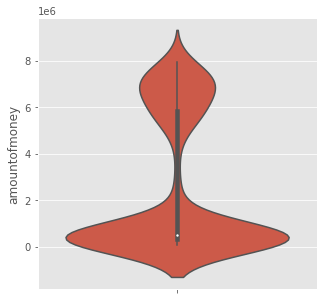

In [18]:
plt.figure(figsize=(5,5))
sns.violinplot(y=aml['amountofmoney'])
plt.show()

In [19]:
print(aml['date'].min())
print(aml['date'].max())

2019-02-20 10:23:00
2019-07-20 13:20:00


In [20]:
aml = aml.set_index(aml['date'])

In [21]:
aml['weekly_av_money'] = aml['amountofmoney'].rolling(7).mean()

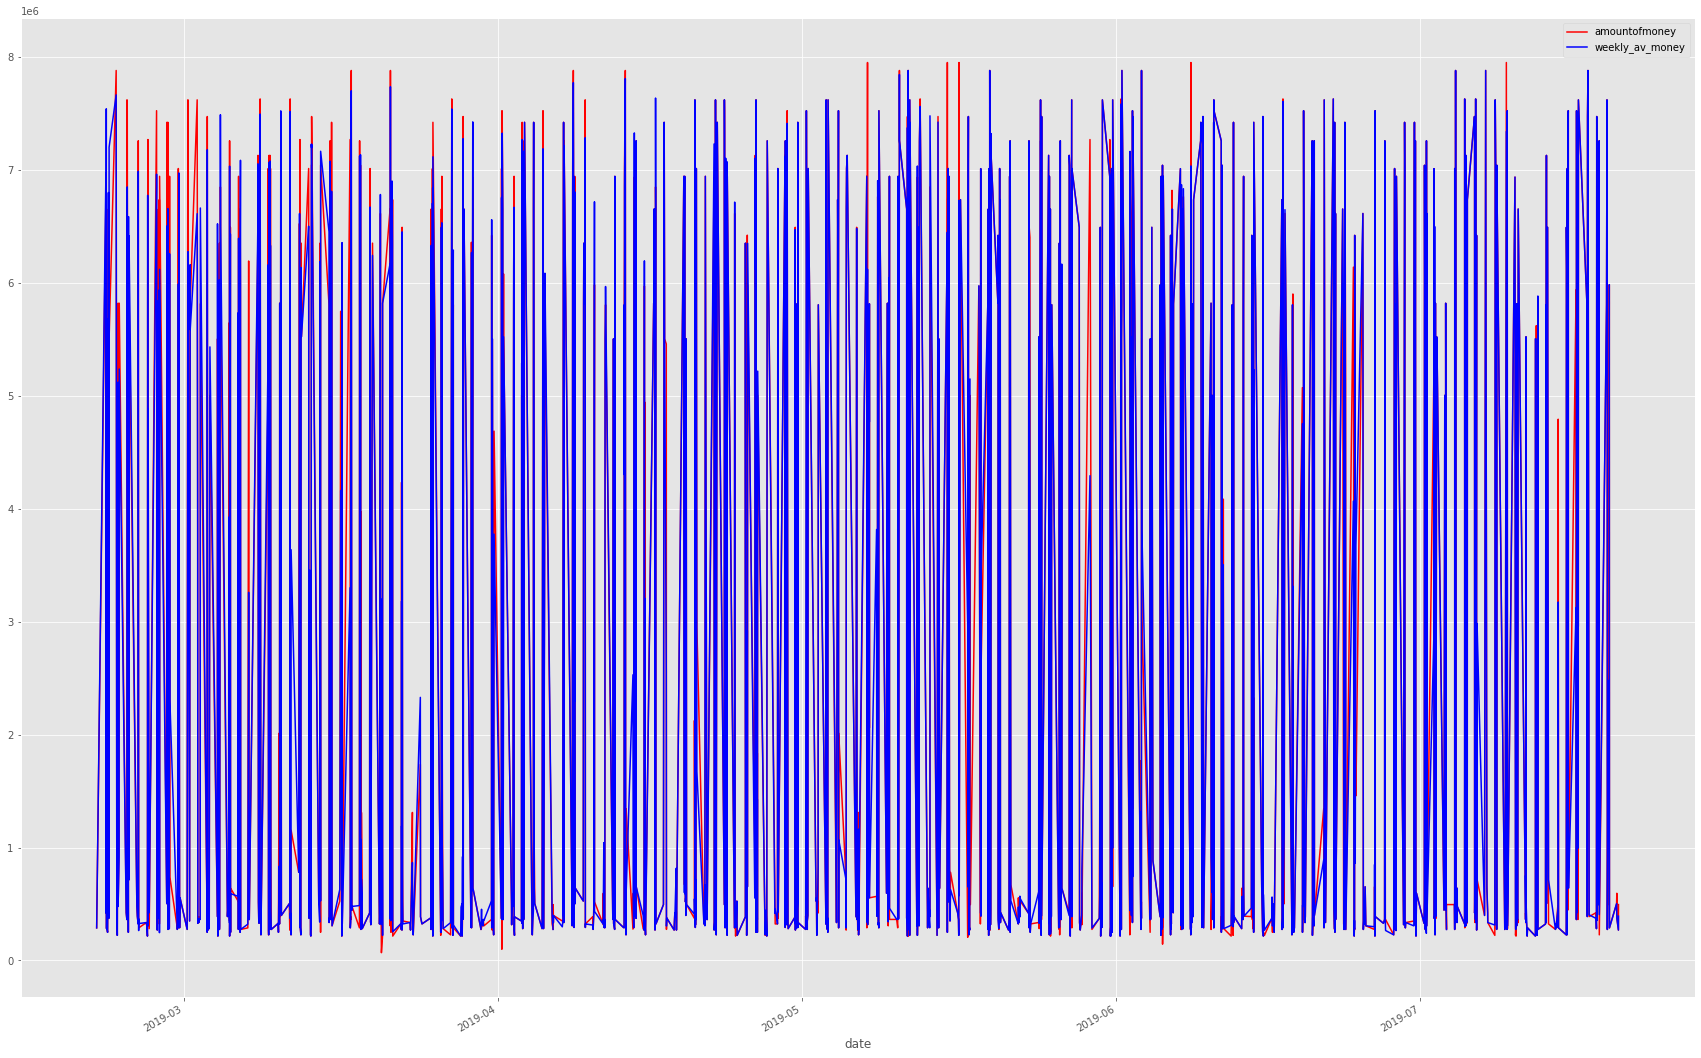

In [66]:
plt.figure(figsize=(30,20))
aml['amountofmoney'].plot(grid=True, color='red')
aml['weekly_av_money'].plot(color='blue')
plt.legend()

In [67]:
aml.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1484 entries, 2019-07-19 14:40:00 to 2019-07-05 09:12:00
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   typeofaction     1484 non-null   int64         
 1   sourceid         1484 non-null   int64         
 2   destinationid    1484 non-null   int64         
 3   amountofmoney    1484 non-null   float64       
 4   date             1484 non-null   datetime64[ns]
 5   isfraud          1484 non-null   int64         
 6   typeoffraud      1484 non-null   int64         
 7   guiltyid         1484 non-null   int64         
 8   crime_int        1484 non-null   int32         
 9   weekly_av_money  1478 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(6)
memory usage: 121.7 KB


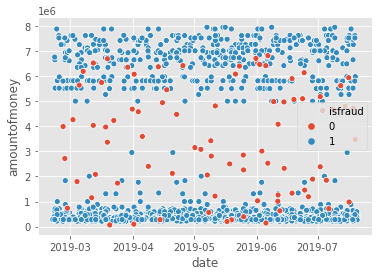

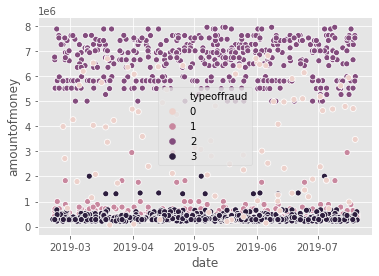

In [68]:
sns.scatterplot('date', 'amountofmoney', hue='isfraud', data=aml)
plt.show()
sns.scatterplot('date', 'amountofmoney', hue='typeoffraud', data=aml)
plt.show()

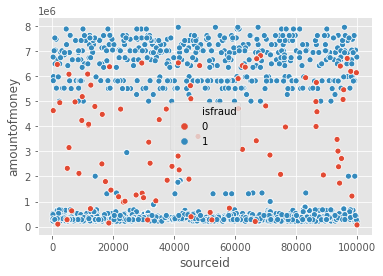

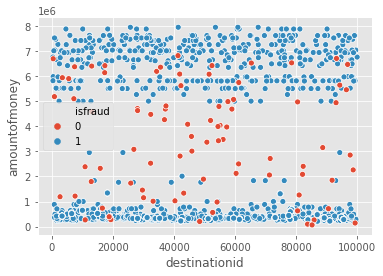

In [69]:
sns.scatterplot('sourceid', 'amountofmoney', hue='isfraud', data=aml)
plt.show()
sns.scatterplot('destinationid', 'amountofmoney', hue='isfraud', data=aml)
plt.show()

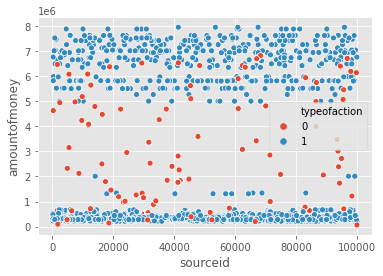

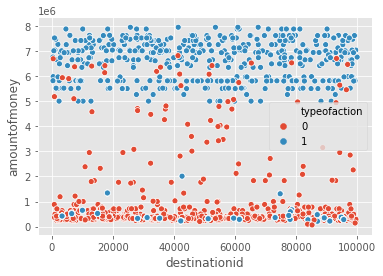

In [70]:
## 1 - transfer
## 0 - cash-in

sns.scatterplot('sourceid', 'amountofmoney', hue='typeofaction', data=aml)
plt.show()
sns.scatterplot('destinationid', 'amountofmoney', hue='typeofaction', data=aml)
plt.show()

In [71]:
aml.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud,guiltyid,crime_int,weekly_av_money
date,,,,,,,,,,
2019-07-19 14:40:00,0,30105,28942,494528.0,2019-07-19 14:40:00,1,1,30105,1,NaN
2019-05-17 14:57:00,0,30105,8692,494528.0,2019-05-17 14:57:00,1,1,80740,1,NaN
2019-07-20 13:20:00,0,30105,60094,494528.0,2019-07-20 13:20:00,1,1,92735,1,NaN
2019-07-03 14:15:00,0,30105,20575,494528.0,2019-07-03 14:15:00,1,1,1615,1,NaN
2019-05-26 10:40:00,0,30105,45938,494528.0,2019-05-26 10:40:00,1,1,4161,1,NaN


<AxesSubplot:xlabel='isfraud'>

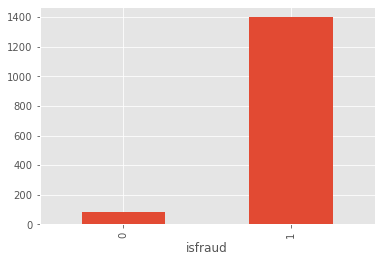

In [72]:
aml.groupby('isfraud')['typeoffraud'].count().plot(kind='bar')

<AxesSubplot:xlabel='typeoffraud'>

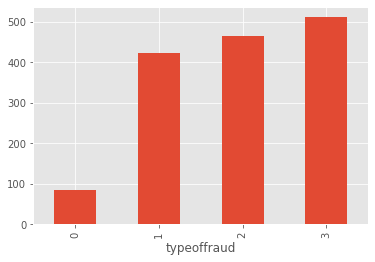

In [73]:
aml.groupby('typeoffraud')['isfraud'].count().plot(kind='bar')

<AxesSubplot:xlabel='isfraud'>

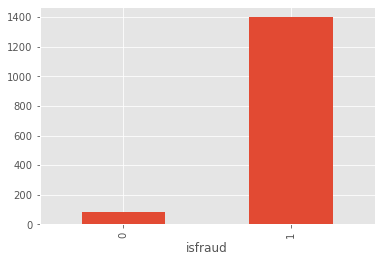

In [74]:
aml.groupby('isfraud')['typeofaction'].count().plot(kind='bar')

# Fraud Classification

In [75]:
aml.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1484 entries, 2019-07-19 14:40:00 to 2019-07-05 09:12:00
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   typeofaction     1484 non-null   int64         
 1   sourceid         1484 non-null   int64         
 2   destinationid    1484 non-null   int64         
 3   amountofmoney    1484 non-null   float64       
 4   date             1484 non-null   datetime64[ns]
 5   isfraud          1484 non-null   int64         
 6   typeoffraud      1484 non-null   int64         
 7   guiltyid         1484 non-null   int64         
 8   crime_int        1484 non-null   int32         
 9   weekly_av_money  1478 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(6)
memory usage: 121.7 KB


In [76]:
X = aml.drop('date', axis=1)

In [77]:
X = X.reset_index()

In [78]:
X = X.drop(['date','weekly_av_money'], axis=1)

In [79]:
X.corr()

,typeofaction,sourceid,destinationid,amountofmoney,isfraud,typeoffraud,guiltyid,crime_int
typeofaction,1.000000,-0.001330,0.121349,0.384308,0.341660,0.867449,0.026539,0.435106
sourceid,-0.001330,1.000000,0.001440,0.041866,0.027287,-0.014556,-0.006532,-0.084214
destinationid,0.121349,0.001440,1.000000,-0.083845,0.045525,0.165303,-0.027697,0.155140
amountofmoney,0.384308,0.041866,-0.083845,1.000000,-0.079277,-0.097698,0.013482,-0.214518
isfraud,0.341660,0.027287,0.045525,-0.079277,1.000000,0.518285,0.023794,-0.284516
typeoffraud,0.867449,-0.014556,0.165303,-0.097698,0.518285,1.000000,0.021958,0.505315
guiltyid,0.026539,-0.006532,-0.027697,0.013482,0.023794,0.021958,1.000000,-0.012500
crime_int,0.435106,-0.084214,0.155140,-0.214518,-0.284516,0.505315,-0.012500,1.000000


In [80]:
X = X.drop(['isfraud', 'typeoffraud'], axis=1)

In [81]:
y = aml['typeoffraud']

In [82]:
print(X.shape)
print(y.shape)

(1484, 6)
(1484,)


In [83]:
import sklearn
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [85]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True)
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

## Logistic Regression

In [86]:
#Fitting data to a logistic regression model
#Logistic regression is a classification model
#I used class_weight='balanced' to balance out the 3 seprate classes
#When I added class_weight='balanced', my precision imporved
#With 'ovr' - onevsrest - a binary problem is fit for each class
#'saga' is used for larger datasets and can handle no penalty and multinominal loss(cross-entropy)
#Cross-entropy increases as the predicted probability moves away from actual label
#Cross-entropy calculates total entropy between the probability distributions(difference between the two distributions)
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(class_weight='balanced', random_state=0, solver='saga', multi_class='ovr' )

In [87]:
logR.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', multi_class='ovr', random_state=0,
                   solver='saga')

In [88]:
predictions = logR.predict(X_test)

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.99      0.95      0.97        80
           2       1.00      1.00      1.00        76
           3       1.00      1.00      1.00       121

    accuracy                           0.98       297
   macro avg       0.95      0.97      0.96       297
weighted avg       0.98      0.98      0.98       297



## KNN

In [114]:
#K Nearest Neighbors
#P=2 - Euclidean distance formula
#N_neigbors = 2 gets the highest precision for correctly classifying non - functional which I think is most important to prevent
#sickness
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors=2, p=2)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [115]:
test_preds = clf.predict(X_test)

In [116]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.99      0.95      0.97        80
           2       1.00      1.00      1.00        76
           3       1.00      1.00      1.00       121

    accuracy                           0.98       297
   macro avg       0.95      0.97      0.96       297
weighted avg       0.98      0.98      0.98       297



## Niave Bayes

In [117]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB().fit(X_train, y_train)

In [118]:
accuracy_score(y_test, nb.predict(X_test))

0.9797979797979798

In [119]:
print(classification_report(y_test,  nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.97      0.95      0.96        80
           2       1.00      1.00      1.00        76
           3       1.00      1.00      1.00       121

    accuracy                           0.98       297
   macro avg       0.95      0.96      0.95       297
weighted avg       0.98      0.98      0.98       297



LR: 0.567812 (0.321597)
KNN: 0.590282 (0.194051)
NB: 0.286595 (0.433954)


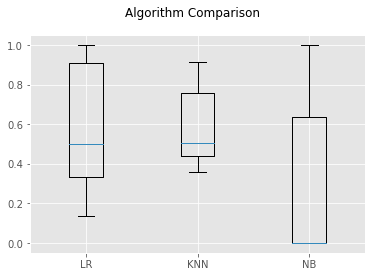

In [120]:
import warnings
warnings.filterwarnings("ignore")
#Looking for high mean and low variance
#This contradicts some of the accuracy scores we got above
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', BernoulliNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = sklearn.model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = sklearn.model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()